In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

### Model 5:

Model will evaluate impact on Sale Price of:
- Total sqft House (feature engineering)
- Land area
- Condition
- Quality
- Interaction of Condition/Quality (feature engineering)
- Total # of Bathrooms (feature engineering)
- Bedrooms (proxy Above-Ground Bedrooms)
- Neighborhood (dummy)
- Garage capacity
- House Style (dummy)


### Feature Engineering

**Neighborhood (dummy):**

In [8]:
%store -r df_no_na
enc = OneHotEncoder()
cols = ["Neighborhood"]
column_name = []
for col in cols:
    column_name += [f"{col[0]}_{cat}" for cat in list(df_no_na[col].unique())]
column_name

enc_data_prep = enc.fit_transform(df_no_na[['Neighborhood']]).toarray()
enc_data_1 = pd.DataFrame(enc_data_prep, columns=column_name)
df_no_na_7 = df_no_na.join(enc_data_1)

In [9]:
#repeat for test data
%store -r df_test_no_na

cols = ["Neighborhood"]
column_name_area = []
for col in cols:
    column_name_area += [f"{col[0]}_{cat}" for cat in list(df_test_no_na[col].unique())]
column_name_area

enc_data_prep_test = enc.fit_transform(df_test_no_na[['Neighborhood']]).toarray()
enc_data_1_test = pd.DataFrame(enc_data_prep_test, columns=column_name_area)
df_test_no_na_7 = df_test_no_na.join(enc_data_1_test)

<br>

**House Style (dummy):**

In [33]:
cols = ["House Style"]
column_name_hs = []
for col in cols:
    column_name_hs += [f"{col[0]}_{cat}" for cat in list(df_no_na[col].unique())]
column_name_hs

enc_data_hs = enc.fit_transform(df_no_na[['House Style']]).toarray()
enc_data_hs_ = pd.DataFrame(enc_data_hs, columns=column_name_hs)
df_no_na_81 = df_no_na_7.join(enc_data_hs_)

In [34]:
#repeat for test data
cols = ["House Style"]
column_name_hs_test = []
for col in cols:
    column_name_hs_test += [f"{col[0]}_{cat}" for cat in list(df_test_no_na[col].unique())]
column_name_hs_test

enc_data_hs_test = enc.fit_transform(df_test_no_na[['House Style']]).toarray()
enc_data_hs__ = pd.DataFrame(enc_data_hs_test, columns=column_name_hs_test)
df_test_no_na_81 = df_test_no_na_7.join(enc_data_hs__)

In [12]:
x_shape_check = (df_no_na_8.shape,df_test_no_na_8.shape)
x_shape_check

((2049, 122), (878, 114))

In [13]:
#check which columns don't exist in the test file
x_column_check = list(zip(df_no_na_8.columns,df_test_no_na_8.columns))
x_column_check

[('Id', 'Id'),
 ('PID', 'PID'),
 ('MS SubClass', 'MS SubClass'),
 ('MS Zoning', 'MS Zoning'),
 ('Lot Frontage', 'Lot Frontage'),
 ('Lot Area', 'Lot Area'),
 ('Street', 'Street'),
 ('Alley', 'Alley'),
 ('Lot Shape', 'Lot Shape'),
 ('Land Contour', 'Land Contour'),
 ('Utilities', 'Utilities'),
 ('Lot Config', 'Lot Config'),
 ('Land Slope', 'Land Slope'),
 ('Neighborhood', 'Neighborhood'),
 ('Condition 1', 'Condition 1'),
 ('Condition 2', 'Condition 2'),
 ('Bldg Type', 'Bldg Type'),
 ('House Style', 'House Style'),
 ('Overall Qual', 'Overall Qual'),
 ('Overall Cond', 'Overall Cond'),
 ('Year Built', 'Year Built'),
 ('Year Remod/Add', 'Year Remod/Add'),
 ('Roof Style', 'Roof Style'),
 ('Roof Matl', 'Roof Matl'),
 ('Exterior 1st', 'Exterior 1st'),
 ('Exterior 2nd', 'Exterior 2nd'),
 ('Mas Vnr Type', 'Mas Vnr Type'),
 ('Mas Vnr Area', 'Mas Vnr Area'),
 ('Exter Qual', 'Exter Qual'),
 ('Exter Cond', 'Exter Cond'),
 ('Foundation', 'Foundation'),
 ('Bsmt Qual', 'Bsmt Qual'),
 ('Bsmt Cond', 'Bsmt

In [35]:
#Looks like we have some mismatches across the training and testing data set:
#-we need to add the following columns to the training data- 'H_1.5Unf', 'H_2.5Fin', 'H_2.5Unf'
#-we need to add the following columns to the testing data -'N_GrnHill', 'N_Landmrk'
df_no_na_81["H_1.5Unf"]=0
df_no_na_81["H_2.5Fin"]=0
df_no_na_81["H_2.5Unf"]=0
df_test_no_na_81["N_GrnHill"]=0
df_test_no_na_81["N_Landmrk"]=0

In [3]:
#I developed a more sophisticated formula for how to cross check column headers/shape in a subsequent model.

In [36]:
columns_to_drop_5 = ['Id',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'Sale Type',]

In [37]:
features_5 = [col for col in df_no_na_81.columns if col not in columns_to_drop_5]

In [38]:
features_5_test = [col for col in df_test_no_na_81.columns if col not in columns_to_drop_5]

In [39]:
df_no_na_81 = df_no_na_81[features_5]

In [40]:
#repeat for test data
#df_test_no_na_7 = df_test_no_na_7[features_5]
df_test_no_na_81 = df_test_no_na_81[features_5_test]

In [41]:
df_no_na_81.dropna(how = "any", inplace = True)

In [42]:
#repeat for test data
df_test_no_na_81.dropna(how = "any", inplace = True)

In [43]:
xa_shape_check = (df_no_na_8.shape,df_test_no_na_8.shape)
xa_shape_check

((2046, 46), (878, 40))

In [44]:
df_no_na_81.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Bedroom AbvGr',
       'Garage Cars', 'SalePrice', 'Total_SF', 'Qual_cond', 'Bathrooms',
       'Transform_SF', 'Transform_SalePrice', 'N_Sawyer', 'N_SawyerW',
       'N_NAmes', 'N_Timber', 'N_Edwards', 'N_OldTown', 'N_BrDale',
       'N_CollgCr', 'N_Somerst', 'N_Mitchel', 'N_StoneBr', 'N_NridgHt',
       'N_Gilbert', 'N_Crawfor', 'N_IDOTRR', 'N_NWAmes', 'N_Veenker',
       'N_MeadowV', 'N_SWISU', 'N_NoRidge', 'N_ClearCr', 'N_Blmngtn',
       'N_BrkSide', 'N_NPkVill', 'N_Blueste', 'N_GrnHill', 'N_Greens',
       'N_Landmrk', 'H_2Story', 'H_1Story', 'H_1.5Fin', 'H_SFoyer', 'H_SLvl',
       'H_2.5Unf', 'H_2.5Fin', 'H_1.5Unf'],
      dtype='object')

In [46]:
X_5 = df_no_na_81.drop(columns = ['N_Sawyer', 'SalePrice', "Transform_SF", "Transform_SalePrice"])
y_5 = df_no_na_81["SalePrice"]

In [48]:
#some of the root data was updated in subsequent models, and I'm just removing these variables here.

In [47]:
X_5_test = df_test_no_na_81.drop(columns = ['N_Sawyer'])

### Model - Linear Regression

In [49]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X_5, y_5, random_state=42)

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(X5_train, y5_train)

LinearRegression()

In [52]:
lr.score(X5_train,y5_train)

0.8051837042452427

In [53]:
lr.score(X5_test,y5_test)

0.7979854193398721

In [54]:
y_5_pred = lr.predict(X5_test) #validate model

In [55]:
rmse_5 = np.sqrt(mean_squared_error(y5_test, y_5_pred))

In [56]:
print(f"train_data r^2: {lr.score(X5_train,y5_train)}.")
print(f"validation_data r^2: {lr.score(X5_test, y5_test)}.")
print(f"root mean squared error: {rmse_5}.")

train_data r^2: 0.8051837042452427.
validation_data r^2: 0.7979854193398721.
root mean squared error: 35174.611680551636.


In [57]:
X_5_test_pred = X_5_test.values

In [ ]:
%store -r df_test
submission5 = pd.DataFrame(df_test, columns=["Id"])
submission5["SalePrice"] = lr.predict(X_5_test_pred)

In [728]:
submission5.to_csv('../datasets/submission5.csv', index=False)

### Model Validation

In [60]:
lr_scores = cross_val_score(lr, X5_train, y5_train, cv = 3)
lr_scores

array([0.81331346, 0.82220838, 0.59440378])

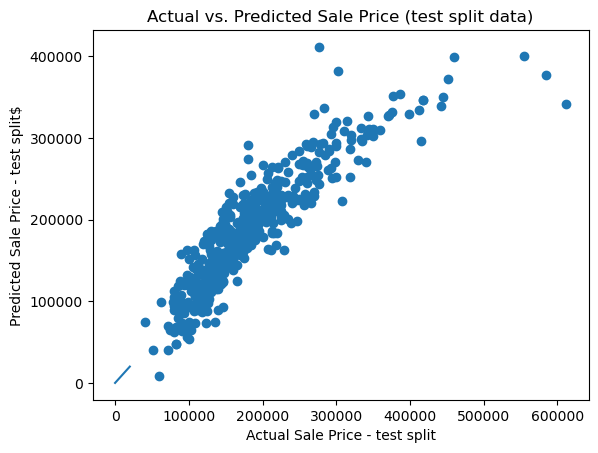

In [61]:
plt.scatter(y5_test, y_5_pred)
plt.plot(range(20000), range(20000))

plt.xlabel("Actual Sale Price - test split")
plt.ylabel("Predicted Sale Price - test split$")
plt.title("Actual vs. Predicted Sale Price (test split data)")

plt.show()

**Note:** we can see that the tail of the data is getting more spread, so likely the model behaves differently when sale prices increase. Likewise, the cross validation results show significant variation, which means our results aren't going to be consistent with this model.

In [63]:
lasso = LassoCV(n_alphas=200)
lasso_scores = cross_val_score(lasso, X5_train, y5_train, cv = 3)
lasso_scores.mean()

0.6133394639746349

In [65]:
lasso.fit(X5_train, y5_train)

LassoCV(n_alphas=200)

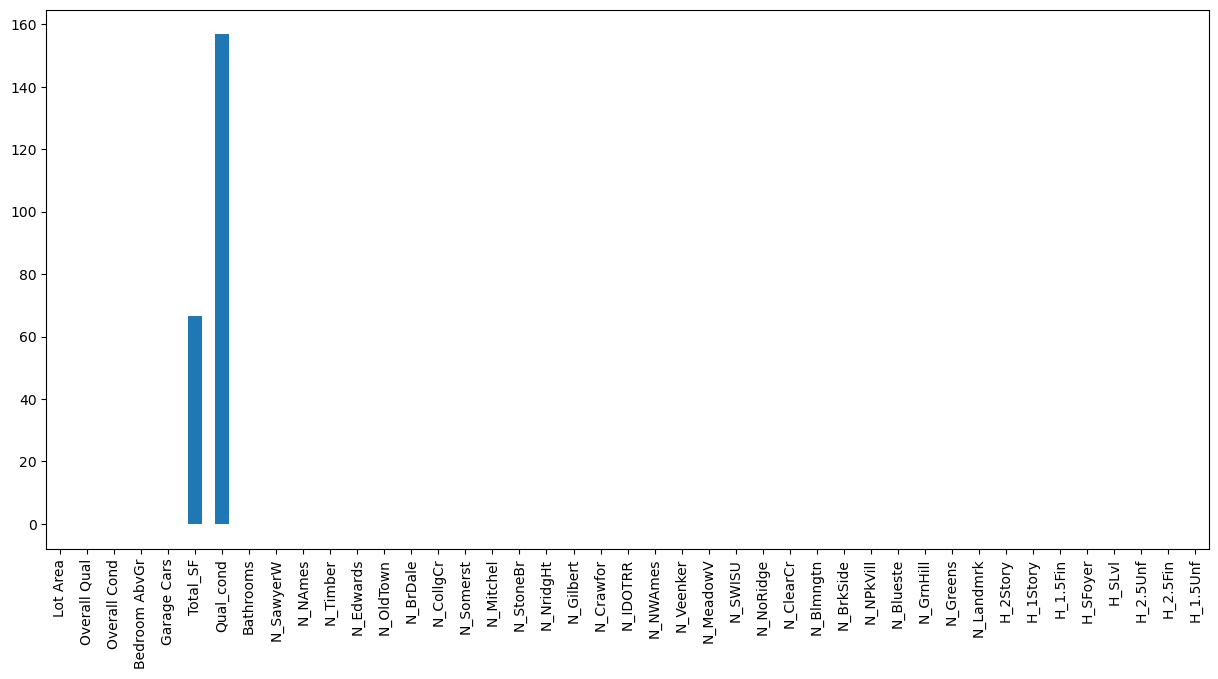

In [66]:
pd.Series(lasso.coef_, index=X_5.columns).plot.bar(figsize = (15, 7));

**Note:**
- A pretty sad result and model, but also curious about the outcome here, as we know that some variables that are shown to have a 0 coefficient, definitely have an impact on Sale Price

In [62]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
ridge_scores = cross_val_score(ridge, X5_train, y5_train, cv = 3)
ridge_scores.mean()

0.7486298046910637